In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import find_peaks

In [2]:
def makeH_2_4(C, numem, spread, g, J, w, points):
    P = 0.01
    kappa = 10.
    tau = 5.8
        
    gamma = 1/tau
#     if J < 1:
#         w_list = np.linspace(-25, 25, points)
    if J == 1:
        w_list = np.linspace(-50, 50, points)
#     if J == 5:
#         w_list = np.linspace(-100, 100, points)    
    if J == 10:
        w_list = np.linspace(-50, 50, points)
    if J > 10:
        w_list = np.linspace(-200, 200, points)


    
    we_list = np.random.normal(w, scale = spread/2, size = C*numem)
    # w_list = np.linspace(-4*gcalcs[0], 4*gcalcs[0], points)
    a = []
    a.append(tensor(tensor(destroy(2), qeye(2), qeye(2)), tensor(qeye(2), qeye(2), qeye(2))))
    a.append(tensor(tensor(qeye(2), qeye(2), qeye(2)), tensor(destroy(2), qeye(2), qeye(2))))
    
    s = []
    s.append(tensor(tensor(qeye(2), destroy(2), qeye(2)), tensor(qeye(2), qeye(2), qeye(2))))
    s.append(tensor(tensor(qeye(2), qeye(2), destroy(2)), tensor(qeye(2), qeye(2), qeye(2))))
    s.append(tensor(tensor(qeye(2), qeye(2), qeye(2)), tensor(qeye(2), destroy(2), qeye(2))))
    s.append(tensor(tensor(qeye(2), qeye(2), qeye(2)), tensor(qeye(2), qeye(2), destroy(2))))

    H = 0
    c_ops = []
    for i in range(len(a)):
        H = H + w*a[i].dag() * a[i]
        c_ops.append(np.sqrt(kappa) * a[i])
    
    for j in range(len(s)):
        H = H + we_list[j] * s[j].dag() * s[j]
        c_ops.append(np.sqrt(gamma) * s[j])
        
    
    H = H + g * (s[0].dag()*a[0] + a[0].dag() * s[0])
    H = H + g * (s[1].dag()*a[0] + a[0].dag() * s[1])
    H = H + g * (s[2].dag()*a[1] + a[1].dag() * s[2])
    H = H + g * (s[3].dag()*a[1] + a[1].dag() * s[3])
    
    H = H - J * (a[0].dag() * a[1] + a[1].dag() * a[0])
    
    c_ops.append(np.sqrt(P) * a[0].dag())
    return H, w_list, c_ops, a, s, we_list

def run_spec(C, numem, spread, g, J, w, points):
    plt.close('all')
    Jems = False
    if C == 2:
#         H, w_list, c_ops, a, s = makeH_2_4(C, numem, spread, g, J, w, points)
        H_spread, w_list, c_ops_spread, a_spread,s_spread, we_list = makeH_2_4(C, numem, spread, g, J, w, points)
        print('Hamiltonians made')

        
    if C ==1: 
        H_spread, w_list, c_ops_spread, a_spread, s_spread = makeH_1_4(C, numem, spread, g, w, points)

#         H, w_list, c_ops, a, s = makeH_1_4(C, numem, spread, g, w, points)
        print('Hamiltonians made')

#     spec = spectrum(H, w_list, c_ops, a[0].dag(), a[0])
#     spec = spec - min(spec)
#     spec = spec/max(spec)
#     print('No spread finished')

    spec_spread = spectrum(H_spread, w_list, c_ops_spread, a_spread[0].dag(), a_spread[0])
    spec_spread =spec_spread - min(spec_spread)
    spec_spread = spec_spread/max(spec_spread)
#     plt.plot(w_list, spec_spread)
    return spec_spread, w_list
#     np.savetxt('checks/number cavs' + str(C) + '_emsinside' + str(4) + '_spread' +str(spread) + '_J' +str(J)+ '_g' +str(g) + '.txt', np.transpose([w_list, spec_spread]))

def run_eigens(C, numem, spread, g, J, w, points):
    if C == 2:
#         H, w_list, c_ops, a, s = makeH_2_4(C, numem, spread, g, J, w, points)
        H, w_list, c_ops, a, s, we_list = makeH_2_4(C, numem, spread, g, J, w, points)       
    if C ==1: 
        H_spread, w_list, c_ops_spread, a_spread, s_spread, we_list = makeH_1_4(C, numem, spread, g, w, points)

    eigens = H.eigenstates()
    return eigens[0], eigens[1], H, w_list, c_ops, a, s, we_list

def run_both(C, numem, spread, g, J, w, points):
    plt.close('all')

    H, w_list, c_ops, a,s, we_list = makeH_2_4(C, numem, spread, g, J, w, points)
#     print('Hamiltonians made')
    eigens = H.eigenstates()
    spec = spectrum(H, w_list, c_ops, a[0].dag(), a[0])
    spec =spec - min(spec)
    spec = spec/max(spec)
        

    return spec, w_list, eigens[0], eigens[1]

In [ ]:
C = 2
numem = 4
g = 10
cavcoup = [1, 10, 100]
# cavcoup = [100]

counts = 1
w = 0
points = 500
# emspread = [g/4 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
# 


for J in cavcoup:
    if J == 1: fname = 'spreadspecs/1J/'
    if J == 10: fname = 'spreadspecs/10J/'
    if J == 100: fname = 'spreadspecs/100J/'
    print(J)
    for spread in emspread:
        print(spread)
        for i in range(counts):
            print(i)
            try:
                spec, w_list, eigenvals, eigenvects = run_both(C, numem, spread, g, J, w, points)
            except:
                spec, w_list, eigenvals, eigenvects = run_both(C, numem, spread, g, J, w, points)

            np.savetxt(fname + 'spec_spread' + str(spread) + '_' + str(i)+'.txt',  [spec, w_list])
            np.savetxt(fname + 'eigens_spread' + str(spread) + '_' + str(i)+'.txt',  np.transpose(eigenvals))


            fig, cx = plt.subplots(1,1)
            cx.plot(w_list, spec, linewidth=2, label = '$\delta$ = {}GHz')
#             cx.tick_params(axis='both', which='major', labelsize=24)  

#             cx.set_xlabel('$\omega/2\pi$ (GHz)',fontsize = 32)
#             cx.set_ylabel('Transmission (arb. u.)',fontsize = 32)
            fig.savefig(fname + 'spread' + str(spread) + '_' + str(i) + '.png')


1
0
0
10
0
0
100
0
0


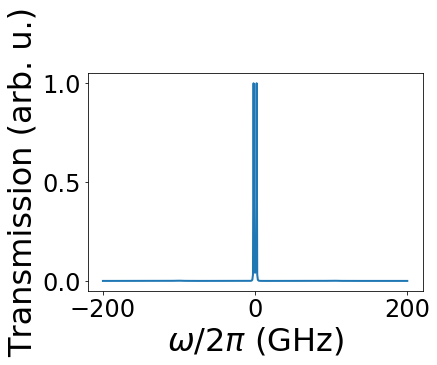

In [100]:

def run_spec(C, numem, spread, g, J, w, points):
    plt.close('all')
    Jems = False
    if C == 2:
#         H, w_list, c_ops, a, s = makeH_2_4(C, numem, spread, g, J, w, points)
        H_spread, w_list, c_ops_spread, a_spread,s_spread, we_list = makeH_2_4(C, numem, spread, g, J, w, points)
        print('Hamiltonians made')

        
    if C ==1: 
        H_spread, w_list, c_ops_spread, a_spread, s_spread = makeH_1_4(C, numem, spread, g, w, points)

#         H, w_list, c_ops, a, s = makeH_1_4(C, numem, spread, g, w, points)
        print('Hamiltonians made')

#     spec = spectrum(H, w_list, c_ops, a[0].dag(), a[0])
#     spec = spec - min(spec)
#     spec = spec/max(spec)
#     print('No spread finished')

    spec_spread = spectrum(H_spread, w_list, c_ops_spread, a_spread[0].dag(), a_spread[0])
    spec_spread =spec_spread - min(spec_spread)
    spec_spread = spec_spread/max(spec_spread)
#     plt.plot(w_list, spec_spread)
    return spec_spread, w_list
#     np.savetxt('checks/number cavs' + str(C) + '_emsinside' + str(4) + '_spread' +str(spread) + '_J' +str(J)+ '_g' +str(g) + '.txt', np.transpose([w_list, spec_spread]))

def run_eigens(C, numem, spread, g, J, w, points):
    if C == 2:
#         H, w_list, c_ops, a, s = makeH_2_4(C, numem, spread, g, J, w, points)
        H, w_list, c_ops, a, s, we_list = makeH_2_4(C, numem, spread, g, J, w, points)       
    if C ==1: 
        H_spread, w_list, c_ops_spread, a_spread, s_spread, we_list = makeH_1_4(C, numem, spread, g, w, points)

    eigens = H.eigenstates()
    return eigens[0], eigens[1], H, w_list, c_ops, a, s, we_list

def run_both(C, numem, spread, g, J, w, points):
    plt.close('all')

    H, w_list, c_ops, a,s, we_list = makeH_2_4(C, numem, spread, g, J, w, points)
#     print('Hamiltonians made')
    eigens = H.eigenstates()
    spec = spectrum(H, w_list, c_ops, s[0].dag(), s[0])
    spec =spec - min(spec)
    spec = spec/max(spec)
        

    return spec, w_list, eigens[0], eigens[1]


C = 2
numem = 4
g = 10
cavcoup = [1, 10, 100]
# cavcoup = [100]
counts = 1
w = 0
points = 500
# emspread = [g/4 * np.sqrt(C), g/2 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
# emspread = [g/4 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
emspread = [0]
# for i in range(2, 11):
# for i in range(17, 21):

#     emspread.append(g/(11-i) * np.sqrt(C))
# for i in range(1,20):
#     emspread.append(i * g/(10) * np.sqrt(C))

for J in cavcoup:
    if J == 1: fname = 'spreadspecs/3themit/1J/'
    if J == 10: fname = 'spreadspecs/3themit/10J/'
    if J == 100: fname = 'spreadspecs/3themit/100J/'
    print(J)
    for spread in emspread:
        print(spread)
        states = []
        for i in range(counts):
            
            print(i)
            try:
                spec, w_list, eigenvals, eigenvects = run_both(C, numem, spread, g, J, w, points)
            except:
                print('except')
                spec, w_list, eigenvals, eigenvects = run_both(C, numem, spread, g, J, w, points)
                
            
            for j in range(len(eigenvals)):
                vector = []
                for k in range(len(eigenvects)):
                    vector.append(float(np.real(eigenvects[j][k][0][0])))
#                         print(vector)
                states.append([eigenvals[j], *vector])
#                     print(states)

            np.savetxt(fname + 'eigens_spread' + str(spread) + '_' + str(i)+'.txt',  states)

            np.savetxt(fname + 'spec_spread' + str(spread) + '_' + str(i)+'.txt',  [spec, w_list])
            np.savetxt(fname + 'eigenvals_spread' + str(spread) + '_' + str(i)+'.txt',  np.transpose(eigenvals))
#             np.savetxt(fname + 'eigenvects_spread' + str(spread) + '_' + str(i)+'.txt',  np.transpose(eigenvects))
            fig, cx = plt.subplots(1,1)
            cx.plot(w_list, spec, linewidth=2, label = '$\delta$ = {}GHz')
            cx.tick_params(axis='both', which='major', labelsize=24)  

            cx.set_xlabel('$\omega/2\pi$ (GHz)',fontsize = 32)
            cx.set_ylabel('Transmission (arb. u.)',fontsize = 32)
            fig.savefig(fname + 'spread' + str(spread) + '_' + str(i) + '.png')
#     print(w_list)

1
3.5355339059327378
0
1
2
3
except
4
5
6
7
8
9
7.0710678118654755
0
1
2
3
4
5
6
7
8
9
14.142135623730951
0
1
2
3
4
5
6
7
8
9
28.284271247461902
0
1
2
3
4
5
6
7
8
9
10
3.5355339059327378
0
1
2
3
4
5
6
7
8
9
7.0710678118654755
0
1
2
3
4
5
6
7
8
9
14.142135623730951
0
1
2
3
4
5
6
7
8
9
28.284271247461902
0
1
2
3
4
5
6
7
8
9
100
3.5355339059327378
0
1
2
3
4
5
6
7
8
9
7.0710678118654755
0
1
2
3
4
5
6
7
8
9
14.142135623730951
0
1
2
3
4
5
6
7
8
9
28.284271247461902
0
1
2
3
4
5
6
7
8
9


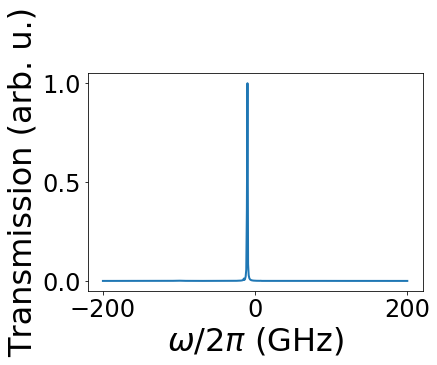

In [5]:
def run_both(C, numem, spread, g, J, w, points):
    plt.close('all')

    H, w_list, c_ops, a,s, we_list = makeH_2_4(C, numem, spread, g, J, w, points)
#     print('Hamiltonians made')
    eigens = H.eigenstates()
    spec = spectrum(H, w_list, c_ops, s[3].dag(), s[3])
    spec =spec - min(spec)
    spec = spec/max(spec)
        

    return spec, w_list, eigens[0], eigens[1]


C = 2
numem = 4
g = 10
cavcoup = [1, 10, 100]
# cavcoup = [100]
counts = 10
w = 0
points = 500
emspread = [g/4 * np.sqrt(C), g/2 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
# emspread = [g/4 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
# emspread = [0]
# for i in range(2, 11):
# for i in range(17, 21):

#     emspread.append(g/(11-i) * np.sqrt(C))
# for i in range(1,20):
#     emspread.append(i * g/(10) * np.sqrt(C))

for J in cavcoup:
    if J == 1: fname = 'spreadspecs/3themit/1J/'
    if J == 10: fname = 'spreadspecs/3themit/10J/'
    if J == 100: fname = 'spreadspecs/3themit/100J/'
    print(J)
    for spread in emspread:
        print(spread)
        states = []
        for i in range(counts):
            
            print(i)
            try:
                spec, w_list, eigenvals, eigenvects = run_both(C, numem, spread, g, J, w, points)
            except:
                print('except')
                spec, w_list, eigenvals, eigenvects = run_both(C, numem, spread, g, J, w, points)
                
            
            for j in range(len(eigenvals)):
                vector = []
                for k in range(len(eigenvects)):
                    vector.append(float(np.real(eigenvects[j][k][0][0])))
#                         print(vector)
                states.append([eigenvals[j], *vector])
#                     print(states)

            np.savetxt(fname + 'eigens_spread' + str(spread) + '_' + str(i)+'.txt',  states)

            np.savetxt(fname + 'spec_spread' + str(spread) + '_' + str(i)+'.txt',  [spec, w_list])
            np.savetxt(fname + 'eigenvals_spread' + str(spread) + '_' + str(i)+'.txt',  np.transpose(eigenvals))
#             np.savetxt(fname + 'eigenvects_spread' + str(spread) + '_' + str(i)+'.txt',  np.transpose(eigenvects))
            fig, cx = plt.subplots(1,1)
            cx.plot(w_list, spec, linewidth=2, label = '$\delta$ = {}GHz')
            cx.tick_params(axis='both', which='major', labelsize=24)  

            cx.set_xlabel('$\omega/2\pi$ (GHz)',fontsize = 32)
            cx.set_ylabel('Transmission (arb. u.)',fontsize = 32)
            fig.savefig(fname + 'spread' + str(spread) + '_' + str(i) + '.png')
#     print(w_list)

In [ ]:

def run_spec(C, numem, spread, g, J, w, points):
    plt.close('all')
    Jems = False
    if C == 2:
#         H, w_list, c_ops, a, s = makeH_2_4(C, numem, spread, g, J, w, points)
        H_spread, w_list, c_ops_spread, a_spread,s_spread, we_list = makeH_2_4(C, numem, spread, g, J, w, points)
        print('Hamiltonians made')

        
    if C ==1: 
        H_spread, w_list, c_ops_spread, a_spread, s_spread = makeH_1_4(C, numem, spread, g, w, points)

#         H, w_list, c_ops, a, s = makeH_1_4(C, numem, spread, g, w, points)
        print('Hamiltonians made')

#     spec = spectrum(H, w_list, c_ops, a[0].dag(), a[0])
#     spec = spec - min(spec)
#     spec = spec/max(spec)
#     print('No spread finished')

    spec_spread = spectrum(H_spread, w_list, c_ops_spread, a_spread[0].dag(), a_spread[0])
    spec_spread =spec_spread - min(spec_spread)
    spec_spread = spec_spread/max(spec_spread)
#     plt.plot(w_list, spec_spread)
    return spec_spread, w_list
#     np.savetxt('checks/number cavs' + str(C) + '_emsinside' + str(4) + '_spread' +str(spread) + '_J' +str(J)+ '_g' +str(g) + '.txt', np.transpose([w_list, spec_spread]))

def run_eigens(C, numem, spread, g, J, w, points):
    if C == 2:
#         H, w_list, c_ops, a, s = makeH_2_4(C, numem, spread, g, J, w, points)
        H, w_list, c_ops, a, s, we_list = makeH_2_4(C, numem, spread, g, J, w, points)       
    if C ==1: 
        H_spread, w_list, c_ops_spread, a_spread, s_spread, we_list = makeH_1_4(C, numem, spread, g, w, points)

    eigens = H.eigenstates()
    return eigens[0], eigens[1], H, w_list, c_ops, a, s, we_list

def run_both(C, numem, spread, g, J, w, points):
    plt.close('all')

    H, w_list, c_ops, a,s, we_list = makeH_2_4(C, numem, spread, g, J, w, points)
#     print('Hamiltonians made')
    eigens = H.eigenstates()
    spec = spectrum(H, w_list, c_ops, a[0].dag(), a[0])
    spec =spec - min(spec)
    spec = spec/max(spec)
        

    return spec, w_list, eigens[0], eigens[1]


C = 2
numem = 4
g = 10
counts = 1
cavcoup = [1, 10, 100]
cav = 0
w = 0
points = 500
# emspread = [g/4 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
emspread = [0]



for J in cavcoup:
    if cav ==0:
        if J == 1: fname = 'spreadspecs/1J/nospread_'
        if J == 10: fname = 'spreadspecs/10J/nospread_'
        if J == 100: fname = 'spreadspecs/100J/nospread_'
    else:
        if J == 1: fname = 'spreadspecs/2ndcav/1J/nospread_'
        if J == 10: fname = 'spreadspecs/2ndcav/10J/nospread_'
        if J == 100: fname = 'spreadspecs/2ndcav/100J/nospread_'
    print(J)
    for spread in emspread:
        print(spread)
        for i in range(counts):
            print(i)
            try:
                spec, w_list, eigenvals, eigenvects = run_both(C, numem, spread, g, J, w, points)
            except:
                spec, w_list, eigenvals, eigenvects = run_both(C, numem, spread, g, J, w, points)

            np.savetxt(fname + 'spec_spread' + str(spread) + '_' + str(i)+'.txt',  [spec, w_list])
            np.savetxt(fname + 'eigens_spread' + str(spread) + '_' + str(i)+'.txt',  np.transpose(eigenvals))


            fig, cx = plt.subplots(1,1)
            cx.plot(w_list, spec, linewidth=2, label = '$\delta$ = {}GHz')
#             cx.tick_params(axis='both', which='major', labelsize=24)  

#             cx.set_xlabel('$\omega/2\pi$ (GHz)',fontsize = 32)
#             cx.set_ylabel('Transmission (arb. u.)',fontsize = 32)
            fig.savefig(fname + 'spread' + str(spread) + '_' + str(i) + '.png')


In [ ]:
mpl.rcParams['errorbar.capsize'] = 3
cav = 1
# emspread = [g/4 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
emspread = []
for i in range(1, 11):
    emspread.append(i*g/(10) * np.sqrt(C))
cavcoup = [1, 10, 100]
diffspreads = []

for spread in emspread:
    for J in cavcoup:
        difs = []
        if cav ==0:
            if J == 1: fname = 'spreadspecs/1J/nospread_eigens_spread0_0.txt'
            if J == 10: fname = 'spreadspecs/10J/nospread_eigens_spread0_0.txt'
            if J == 100: fname = 'spreadspecs/100J/nospread_eigens_spread0_0.txt'
        else:
            if J == 1: fname = 'spreadspecs/2ndcav/1J/nospread_eigens_spread0_0.txt'
            if J == 10: fname = 'spreadspecs/2ndcav/10J/nospread_eigens_spread0_0.txt'
            if J == 100: fname = 'spreadspecs/2ndcav/100J/nospread_eigens_spread0_0.txt'
        no = np.loadtxt(fname, unpack = True)

        if cav ==0:
            if J == 1: 
                fname = 'spreadspecs/1J/'
                name = J1
            if J == 10: 
                fname = 'spreadspecs/10J/'
                name = J10
            if J == 100: 
                fname = 'spreadspecs/100J/'
                name = J100
        else:
            if J == 1: 
                fname = 'spreadspecs/2ndcav/1J/'
                name = J1
            if J == 10: 
                fname = 'spreadspecs/2ndcav/10J/'
                name = J10
            if J == 100: 
                fname = 'spreadspecs/2ndcav/100J/'
                name = J100

        fname = fname = fname + 'eigens_spread' + str(spread)
        for i in range(10):

            file = fname + '_' + str(i)+'.txt'
            eigvals = np.loadtxt(file, unpack = True)

            name.append(np.sqrt((no-eigvals)**2))
        for j in range(len(name[0])):
            for i in range(10):
                eig = []
                eig.append(name[i][j])
            avg = np.mean(eig)
            difs.append(avg)
        diffspreads.append(difs)
        fig, ax = plt.subplots(1,1)
        ax.set_title('Spread' + str(spread)+', J' + str(J))
        ax.errorbar(x = range(0, 64), y = no, yerr = difs, ecolor = 'C1')
        plt.savefig('spreadspecs/difs/2ndcavSpread' + str(emspread.index(spread))+'_J' + str(J))
        np.savetxt('spreadspecs/difs/2ndcavJ' + str(J) + '_Spread' + str(emspread.index(spread)) + '.txt', np.transpose(difs))

In [ ]:
cav = 0
g = 10
C = 2
emspread = [g/4 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
# emspread = [3.5355339059327378]
# for i in range(1, 11):
#     emspread.append(i * g/(10) * np.sqrt(C))
# emspread = [2*g * np.sqrt(C)]
cavcoup = [1, 10, 100]
# cavcoup = [10]
diffspreads = []

inds = {}
specs = [[],[],[]]
splits = []
for spread in emspread:
    for J in cavcoup:
        difs = []
        if cav ==0:
            if J == 1: 
                fname = 'spreadspecs/1J/nospread_spec_spread0_0.txt'
                l = 0
            if J == 10: 
                fname = 'spreadspecs/10J/nospread_spec_spread0_0.txt'
                l = 1
            if J == 100: 
                fname = 'spreadspecs/100J/nospread_spec_spread0_0.txt'
                l = 2
        else:
            if J == 1: fname = 'spreadspecs/2ndcav/1J/nospread_spec_spread0_0.txt'
            if J == 10: fname = 'spreadspecs/2ndcav/10J/nospread_spec_spread0_0.txt'
            if J == 100: fname = 'spreadspecs/2ndcav/100J/nospread_spec_spread0_0.txt'
        nospec = np.loadtxt(fname)

        if cav ==0:
            if J == 1: 
                fname = 'spreadspecs/smallincrements/1J/'
            if J == 10: 
                fname = 'spreadspecs/smallincrements/10J/'
            if J == 100: 
                fname = 'spreadspecs/smallincrements/100J/'
        else:
            if J == 1: 
                fname = 'spreadspecs/2ndcav/1J/'
            if J == 10: 
                fname = 'spreadspecs/2ndcav/10J/'
            if J == 100: 
                fname = 'spreadspecs/2ndcav/100J/'

        fname = fname = fname + 'spec_spread' + str(spread)
        fig,ax = plt.subplots(1,1)
        ax.set_title('J = ' + str(J) + ', Spread = ' + str(spread))
        split = [J, emspread.index(spread)]
        for i in range(10):
            file = fname + '_' + str(i)+'.txt'
            spec = np.loadtxt(file)

            ax.plot(spec[1], spec[0]+i)
            specs[l].append(spec)
#             left = find_peaks(spec[0], width = 2, prominence = .2)[0][0]
#             right = find_peaks(spec[0], width = 2, prominence = .2)[0][-1]
#             split.append((spec[1][right] - spec[1][left]))
            
#         splits.append(split)
#             ax.plot(spec[1][ind[0]], spec[0][ind[0]]+i, 'x')
#             inds[str(J) + '_' + str(emspread.index(spread)) + '_' + str(i)] = ind
#         plt.savefig('spreadspecs/smallincrements/all_waterfall' + 'J' + str(J) + 'spread' + str(spread) + '.png')
#         plt.close('all')
        

In [56]:
cav = 0
g = 10
C = 2
# emspread = [g/4 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
# emspread = [2*g * np.sqrt(C)]
# emspread = []
emspread = [g/4 * np.sqrt(C), g/2 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]

cavcoup = [1,10, 100]
# cavcoup = [10]
diffspreads = []
splits = []
sigs = []
fwhm = []
nospws = []
nosplit = []
for spread in emspread:
#     print()
    print(spread, emspread.index(spread))

    for J in cavcoup:
        difs = []
        print(J)
        if cav ==0:
            if J == 1: 
                fname0 = 'spreadspecs/1themit/1J/spec_spread0_0.txt'
                fname = 'spreadspecs/1themit/1J/'
            if J == 10: 
                fname0 = 'spreadspecs/1themit/10J/spec_spread0_0.txt'
                fname = 'spreadspecs/1themit/10J/'
            if J == 100: 
                fname0 = 'spreadspecs/1themit/100J/spec_spread0_0.txt'
                fname = 'spreadspecs/1themit/100J/'
        nospec = np.loadtxt(fname0)
        left = find_peaks(nospec[0], prominence = 0.01)[0][0]
        right = find_peaks(nospec[0], prominence = 0.01)[0][-1]
        no = nospec[1][right] - nospec[1][left]
        nosplit.append(no)
        fig,ax = plt.subplots(1,1)
        ax.set_title('J = ' + str(J) + ', Spread = ' + str(spread))
        ax.plot(nospec[1], nospec[0])
        ax.plot([nospec[1][left], nospec[1][right]], [nospec[0][left], nospec[0][right]], 'bo')
        
        
#         Y = nospec[0]
#         X = nospec[1]
#         peaks = find_peaks(nospec[0])[0]
        
#         dif = []
#         d = Y[0:peaks[1]] - (Y[peaks[0]] / 2) 
#         d = np.sign(d)
#         for j in range(len(d)-1):
#             if d[j]== d[1+j]: 
#                 continue
#             else: 
#                 dif.append(j)
#         l = X[dif[1]] - X[dif[0]]
#         ax.plot(X[dif], Y[dif], 'X')
        
#         dif = []

#         d = Y[peaks[-2]:] - (Y[peaks[-1]] / 2) 
#         d = np.sign(d)
#         for j in range(len(d)-1):
#             if d[j]==d[j+1]: continue
#             else: dif.append(j)
#         r = X[dif[-1]] - X[dif[-2]]
#         nospreadw = [l,r]
#         dif.pop(0)
#         ax.plot(X[dif + peaks[-2]],  Y[dif+peaks[-2]], 'X')
#         nospws.append(nospreadw)
        
        split = []
        wids = []
        lws = []
        rws = []
#         split.append([spread, J])
        for i in range(10):
#             dif = []
            file = fname + 'spec_spread' + str(spread) + '_' + str(i) + '.txt'
            Y, X = np.loadtxt(file)
            left = find_peaks(Y, prominence = 0.01)[0][0]
            right = find_peaks(Y, prominence = 0.01)[0][-1]
            difs.append((X[right] - X[left]))
            ax.plot(X, Y+i+1)
            ax.plot([X[left], X[right]], [Y[left]+ i + 1, Y[right] + i + 1], 'bo')
            split.append(X[right] - X[left])
            
            peaks = find_peaks(Y)[0]
        
#             d = Y[0:peaks[1]] - (Y[peaks[0]] / 2) 
#             d = np.sign(d)
#             for j in range(len(d)-1):
#                 if d[j]== d[1+j]: 
#                     continue
#                 else: 
#                     dif.append(j)
#             lws.append(X[dif[1]] - X[dif[0]])
#             ax.plot(X[dif], Y[dif]+i+1, 'X')

#             dif = []
#             d = Y[peaks[-2]:] - (Y[peaks[-1]] / 2) 
#             d = np.sign(d)
#             for j in range(len(d)-1):
#                 if d[j]==d[j+1]: continue
#                 else: dif.append(j)
#             rws.append(X[dif[1]] - X[dif[0]])
            
#             ax.plot(X[dif + peaks[-2]],  Y[dif+peaks[-2]]+i+1, 'X')

#         wids.append(lws)
#         wids.append(rws)
#         fwhm.append(wids)
#         sigs.append(np.mean(np.sqrt((no - difs)**2)))
        splits.append(split)
#         print(split)
        
        plt.savefig('spreadspecs/1themit/waterfalls_' + 'J' + str(J) + 'spread' + str(emspread.index(spread)) + '.png')
        plt.close('all')
#         dif.append(difs)    
def rmse(mean, meas):
    err = np.sqrt((1/len(meas)) * sum((meas-mean)**2))
    return err
tens = []
tenw = []
ones = []
onew = []
huns = []
hunw = []
for i in range(len(splits)):
    if i %3 ==0:
        ones.append(rmse(nosplit[0], splits[i]))
        
    if i %3 == 1:
        tens.append(rmse(nosplit[1], splits[i]))
    if i %3 == 2:
        huns.append(rmse(nosplit[2], splits[i]))

3.5355339059327378 0
1
10
100
7.0710678118654755 1
1
10
100
14.142135623730951 2
1
10
100
28.284271247461902 3
1
10
100


Text(0.5, 1.0, ' % RMSE of polariton splitting')

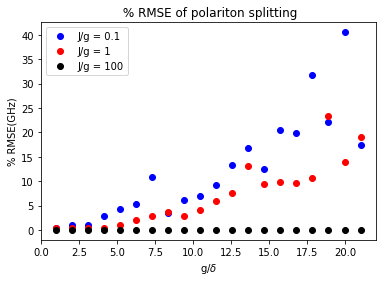

In [11]:
plt.plot(np.linspace(1,21, 20), ones/nosplit[0], 'bo', label = 'J/g = 0.1')
plt.plot(np.linspace(1,21,20), tens/nosplit[1], 'ro', label = 'J/g = 1')
plt.plot(np.linspace(1,21,20), huns/nosplit[2], 'ko', label = 'J/g = 100')
plt.legend()
plt.xlabel('g/$\delta $')
plt.ylabel('% RMSE(GHz)')
plt.title(' % RMSE of polariton splitting')
# plt.plot([g*np.sqrt(C)]*len(emspread), np.linspace(onesplits[0], onesplits[9], len(emspread)))

In [11]:
a = tensor(qeye(2), destroy(2))
s = tensor(destroy(2), qeye(2))
P = 0.01
kappa = 1.
tau = 5.8
gamma = 1/tau
c_ops = [np.sqrt(kappa) * a, np.sqrt(gamma) * s, np.sqrt(P)*a.dag()]
w_list = np.linspace(-1, 1, 10000)

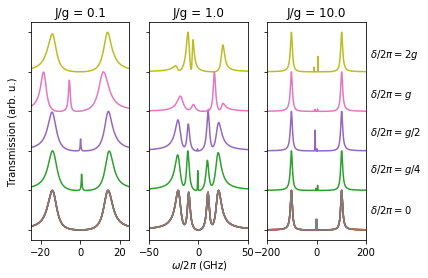

In [4]:
cav = 0
g = 10
C = 2
emspread = [g/4 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
# emspread = [3.5355339059327378]
# for i in range(1, 11):
#     emspread.append(i * g/(10) * np.sqrt(C))
# emspread = [2*g * np.sqrt(C)]
cavcoup = [1, 10, 100]
# cavcoup = [10]
diffspreads = []

inds = {}
specs = [[],[],[]]
splits = []
for spread in emspread:
    for J in cavcoup:
        difs = []
        if cav ==0:
            if J == 1: 
                fname = 'spreadspecs/1J/nospread_spec_spread0_0.txt'
                l = 0
            if J == 10: 
                fname = 'spreadspecs/10J/nospread_spec_spread0_0.txt'
                l = 1
            if J == 100: 
                fname = 'spreadspecs/100J/nospread_spec_spread0_0.txt'
                l = 2
        else:
            if J == 1: fname = 'spreadspecs/2ndcav/1J/nospread_spec_spread0_0.txt'
            if J == 10: fname = 'spreadspecs/2ndcav/10J/nospread_spec_spread0_0.txt'
            if J == 100: fname = 'spreadspecs/2ndcav/100J/nospread_spec_spread0_0.txt'
        nospec = np.loadtxt(fname)

        if cav ==0:
            if J == 1: 
                fname = 'spreadspecs/smallincrements/1J/'
            if J == 10: 
                fname = 'spreadspecs/smallincrements/10J/'
            if J == 100: 
                fname = 'spreadspecs/smallincrements/100J/'
        else:
            if J == 1: 
                fname = 'spreadspecs/2ndcav/1J/'
            if J == 10: 
                fname = 'spreadspecs/2ndcav/10J/'
            if J == 100: 
                fname = 'spreadspecs/2ndcav/100J/'

        fname = fname = fname + 'spec_spread' + str(spread)
        fig,ax = plt.subplots(1,1)
        ax.set_title('J = ' + str(J) + ', Spread = ' + str(spread))
        split = [J, emspread.index(spread)]
        for i in range(10):
            file = fname + '_' + str(i)+'.txt'
            spec = np.loadtxt(file)

            ax.plot(spec[1], spec[0]+i)
            specs[l].append(spec)
#             left = find_peaks(spec[0], width = 2, prominence = .2)[0][0]
#             right = find_peaks(spec[0], width = 2, prominence = .2)[0][-1]
#             split.append((spec[1][right] - spec[1][left]))
            
#         splits.append(split)
#             ax.plot(spec[1][ind[0]], spec[0][ind[0]]+i, 'x')
#             inds[str(J) + '_' + str(emspread.index(spread)) + '_' + str(i)] = ind
#         plt.savefig('spreadspecs/smallincrements/all_waterfall' + 'J' + str(J) + 'spread' + str(spread) + '.png')
        plt.close('all')
        
# emspread = [g/10 * np.sqrt(C)]
fracs = ['g/4', 'g/2 ', 'g', '2g']
cavcoup = [1,10,100]

fig,ax = plt.subplots(3,4, sharey = True)
fig.text(0.07, 0.5, 'Transmission (arb. u.)', va='center', rotation='vertical') #common y-axis
fig.text(0.45, 0.04, '$\omega/2\pi$ (GHz)', va='center') #common x-axis 
fig.text(0.91, 0.23, '$\delta/2\pi = 0$', va='center', fontsize = 10)
fig.text(0.91, 0.37, '$\delta/2\pi = g/4$', va='center', fontsize = 10)
fig.text(0.91, 0.5, '$\delta/2\pi = g/2$', va='center', fontsize = 10)
fig.text(0.91, 0.63, '$\delta/2\pi = g$', va='center', fontsize = 10)
fig.text(0.91, 0.77, '$\delta/2\pi = 2g$', va='center', fontsize = 10)


for j in range(len(cavcoup)):
    for i in range(len(emspread)):      
    fname = 'all_all_0thcav'
    if j == 0
        
        ax[j][i].plot(spec[1], specs[j][i])


        plt.savefig(fname+'.png')
    

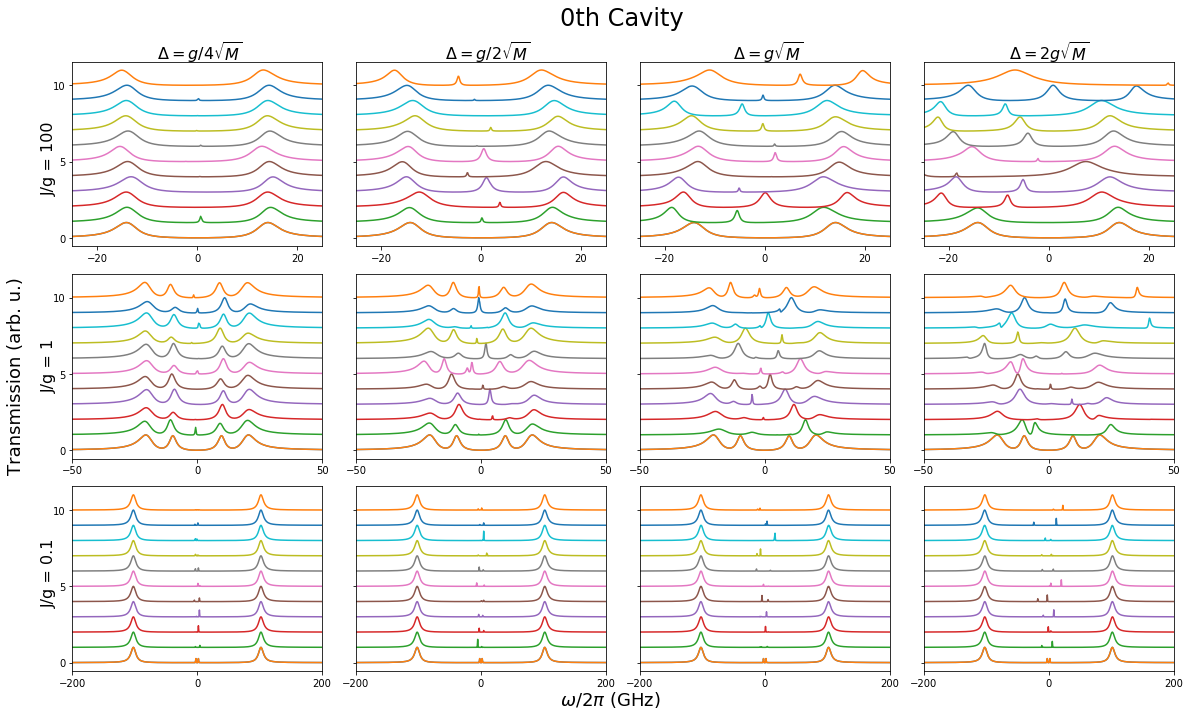

In [106]:
cavity = True
emitter = False
cav = 0
em = 0
g = 10
C = 2
emspread = [g/4 * np.sqrt(C), g/2 * np.sqrt(C), g * np.sqrt(C), 2*g * np.sqrt(C)]
cavcoup = [1, 10, 100]
allspecs = []
fig, ax = plt.subplots(3, 4, sharey = True, figsize = (16,9))

for J in cavcoup:
    specs = []
    for spread in emspread:
        s = []
        if cavity == True:
            if cav ==0:
                if J == 1: 
                    fname = 'spreadspecs/1J/nospread_spec_spread0_0.txt'
                    l = 0
                if J == 10: 
                    fname = 'spreadspecs/10J/nospread_spec_spread0_0.txt'
                    l = 1
                if J == 100: 
                    fname = 'spreadspecs/100J/nospread_spec_spread0_0.txt'
                    l = 2
            else:
                if J == 1: fname = 'spreadspecs/2ndcav/1J/nospread_spec_spread0_0.txt'
                if J == 10: fname = 'spreadspecs/2ndcav/10J/nospread_spec_spread0_0.txt'
                if J == 100: fname = 'spreadspecs/2ndcav/100J/nospread_spec_spread0_0.txt'
            nospec = np.loadtxt(fname)
            ax[cavcoup.index(J)][emspread.index(spread)].plot(nospec[1], nospec[0])

            if cav ==0:
                if J == 1: 
                    fname = 'spreadspecs/smallincrements/1J/'
                    ax[cavcoup.index(J)][emspread.index(spread)].set_xlim(-25, 25)
                if J == 10: 
                    fname = 'spreadspecs/smallincrements/10J/'
                    ax[cavcoup.index(J)][emspread.index(spread)].set_xlim(-50, 50)
                if J == 100: 
                    fname = 'spreadspecs/smallincrements/100J/'
                    ax[cavcoup.index(J)][emspread.index(spread)].set_xlim(-200, 200)
            else:
                if J == 1: 
                    fname = 'spreadspecs/2ndcav/1J/'
                    ax[cavcoup.index(J)][emspread.index(spread)].set_xlim(-25, 25)
                if J == 10: 
                    fname = 'spreadspecs/2ndcav/10J/'
                    ax[cavcoup.index(J)][emspread.index(spread)].set_xlim(-50, 50)
                if J == 100: 
                    fname = 'spreadspecs/2ndcav/100J/'
                    ax[cavcoup.index(J)][emspread.index(spread)].set_xlim(-200, 200)
        
        if emitter == True:
            if J == 1:
                fname = 'spreadspecs/' + str(em) + 'themit/1J/'
                fnameno = 'spreadspecs/' + str(em) + 'themit/1J/spec_spread0_0.txt'
                ax[cavcoup.index(J)][emspread.index(spread)].set_xlim(-25, 25)
            if J == 10:
                fname = 'spreadspecs/' + str(em) + 'themit/10J/'
                fnameno = 'spreadspecs/' + str(em) + 'themit/10J/spec_spread0_0.txt'
                ax[cavcoup.index(J)][emspread.index(spread)].set_xlim(-50, 50)
            if J == 100:
                fname = 'spreadspecs/' + str(em) + 'themit/100J/'
                fnameno = 'spreadspecs/' + str(em) + 'themit/100J/spec_spread0_0.txt'
                ax[cavcoup.index(J)][emspread.index(spread)].set_xlim(-200, 200)
                
            nospec = np.loadtxt(fnameno)
        ax[cavcoup.index(J)][emspread.index(spread)].plot(nospec[1], nospec[0])
        fname = fname = fname + 'spec_spread' + str(spread)
        for i in range(10):
            file = fname + '_' + str(i)+'.txt'
            spec = np.loadtxt(file)
            ax[cavcoup.index(J)][emspread.index(spread)].plot(spec[1], spec[0]+ i+1)
            ax[cavcoup.index(J)][emspread.index(spread)].locator_params(nbins=3, axis='x')
            ax[cavcoup.index(J)][emspread.index(spread)].locator_params(nbins=3, axis='y')


plt.tight_layout()

# fig,ax = plt.subplots(3,4, sharey = True)
fig.text(-0.03, 0.5, 'Transmission (arb. u.)', va='center', rotation='vertical', fontsize = 18) #common y-axis
fig.text(0.45, 0.0, '$\omega/2\pi$ (GHz)', va='center', fontsize = 18) #common x-axis 
fig.text(-0.0, 0.195, 'J/g = 0.1', va='center',rotation='vertical', fontsize = 16)
fig.text(-0.0, 0.515, 'J/g = 1', va='center', rotation='vertical', fontsize = 16)
fig.text(-0.0,.835, 'J/g = 100', va='center', rotation='vertical', fontsize = 16)
fig.text(0.1, 1, '$\Delta = g/4 \sqrt{M}$', va='center', fontsize = 16)
fig.text(0.35, 1, '$\Delta = g/2 \sqrt{M}$', va='center', fontsize = 16)
fig.text(0.6, 1, '$\Delta = g \sqrt{M}$', va='center', fontsize = 16)
fig.text(0.84, 1, '$\Delta = 2g \sqrt{M}$', va='center', fontsize = 16)

# fig.text(0.45, 1.05, str(em) + 'th Emitter', va='center', fontsize = 24)
fig.text(0.45, 1.05, str(cav) + 'th Cavity', va='center', fontsize = 24)

# plt.savefig(str(em) + 'themit_allspread_allJ_waterfall.png')
plt.savefig(str(cav) + 'thecavity_allspread_allJ_waterfall.png')
    

500

In [47]:
ones

[0.12674459559792808,
 0.2886745549276085,
 0.2989265308652522,
 0.8244489952194026,
 1.2218698341898933,
 1.6859294358955268,
 3.0430252992500066,
 0.9542740241129519,
 1.7207066811645912,
 1.9429578586838958]

In [134]:
find_peaks(nospec[0])[0]

array([122, 247, 252, 377], dtype=int64)

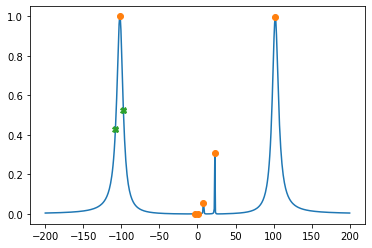

In [211]:
plt.plot(X, Y)
# def fwhm(spec):
X = spec[1]
Y = spec[0]

fwhm = []
peaks = find_peaks(Y)[0]
plt.plot(X[peaks], Y[peaks], 'o')
dif = []
d = Y[0:peaks[1]] - (Y[peaks[0]] / 2) 
d = np.sign(d)
for i in range(len(d)-1):
    if d[i]==d[i+1]: continue
    else: 
        dif.append(i)
plt.plot(X[dif], Y[dif], 'X')
fwhm.append(X[dif[1]] - X[dif[0]])

# dif = []
# d = Y[peaks[-2]:] - (Y[peaks[-1]] / 2) 
# d = np.sign(d)
# for i in range(len(d)-1):
#     if d[i]==d[i+1]: continue
#     else: 
#         dif.append(i)
#         plt.plot(X[i], Y[i], 'X')
# # plt.plot([X[dif[0]], X[dif[1]]], [Y[dif[0]], Y[dif[1]]])
# fwhm.append(X[dif[1]] - X[dif[0]])

In [162]:
same = []
dif = []
fwhm = []
for i in range(len(d)-1):
    if d[i]==d[i+1]: continue
    else: dif.append(i)

In [206]:
dif

[115, 128]

In [210]:
dif

[115, 128]